Predicting the price of a house based on its features
- Dataset: California Housing (from sklearn.datasets)

Import datset

Each row in the dataset represents a small area (similar to a neighborhood or statistical block) in which census averages were calculated.

In [68]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# load the dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# check the first 5 rows
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


Check the dataset

Problems / obs resulted:
1. Some columns have outliers (Rooms, Occup)
2. The population is very unevenly distributed.
3. MedHouseVal seems truncated at 5.0
4. Geographic data could be grouped

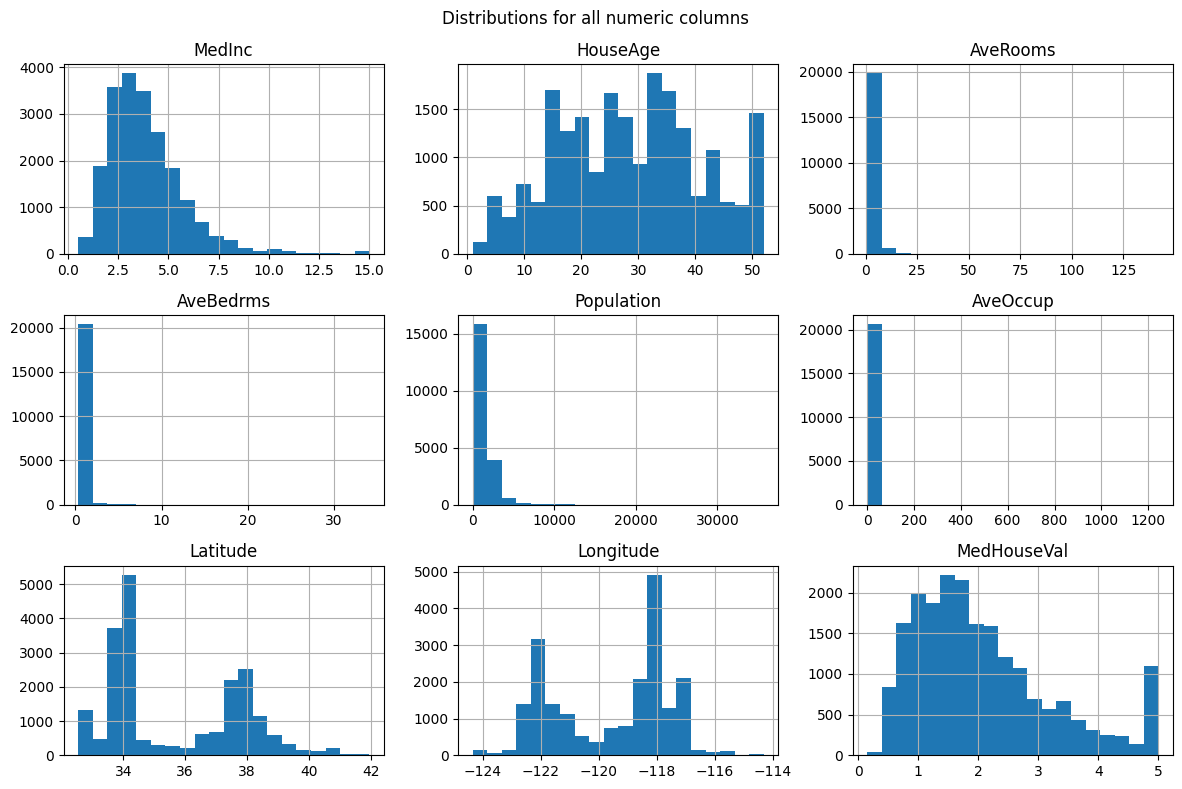

In [60]:
import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(12, 8))
plt.suptitle("Distributions for all numeric columns")
plt.tight_layout()
plt.show()


Eliminate data

We can observe that in the AveOccup column there are unreal informations. We will calculate the the 95th percentile and we see the values of 5% of the data.
Result: 4.33 is not that much so we can eliminate the rows instead of modifing the data

We can observe that in the AveBedrms column there are unreal informations. We will calculate the the 95th percentile and we see the values of 5% of the data.
Result: 4.33 is not that much so we can eliminate the rows instead of modifing the data

In [69]:
p95 = df["AveOccup"].quantile(0.95)  
# print(p95)

dfOld = df
df = df[df["AveOccup"] <= p95]


19608


In [72]:
p95 = df["AveBedrms"].quantile(0.95)  
# print(p95)


df_sub = df[df["AveOccup"] > p95]
print(len(df))
print(len(df_sub) / len(df) * 100)


19608
99.92350061199511
